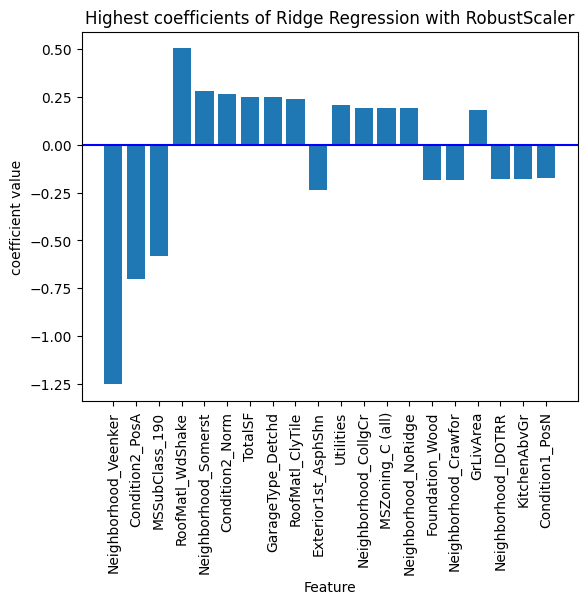

In [4]:
import pandas as pd
import numpy as np
import data 
from bdint.models import LinearRegression
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

robustscaler = True 
train_df = data.get_train_df()
test_df = data.get_test_df()

#skewness_threshold=1.0, alpha = 10**-3, regression_type="Lasso"
#skewness_threshold=0.7, alpha = 1, regression_type="Ridge"
model = LinearRegression(train=train_df, test=test_df, skewness_threshold=0.7, alpha = 1, regression_type="Ridge")

df = model.train
df = df.astype('float64')
norm = 'Normalizaiton'
if robustscaler==True:
    norm = 'RobustScaler'
    robust_scl = RobustScaler()
    robust_scl.fit(df)
    df_scaled = robust_scl.transform(df)
    model.train = pd.DataFrame(data = df_scaled, columns = df.columns, index = df.index)
else:   
    normalized_df=(df-df.min())/(df.max()-df.min())
    normalized_df.fillna(0, inplace=True) # fix case when max is 0 (all False)
    # normalized_df['SalePrice'] = train_df['SalePrice']
    model.train = normalized_df

model.learn(train_x=model.train.drop(columns=["SalePrice"], inplace=False), train_y=pd.DataFrame(model.train["SalePrice"]))

coefficients = [[]]
if model.name == 'Ridge':
    coefficients = model.model.coef_
elif model.name == 'Lasso':
    coefficients[0] = model.model.coef_
# elif model.name == 'KernelRidge':
#     coeff = np.array(model.model.dual_coef_)
#     for c in coeff:
#         coefficients[0].append(c[0])

index_highest_coefficients = np.argsort(np.absolute(coefficients))[0][-20:][::-1]

# coefficients = model.model.coef_
# index_highest_coefficients = np.argsort(abs(coefficients))[0][-20:][::-1]
# feature_names = model.train.columns[index_highest_coefficients]

plt.bar(model.train.columns[index_highest_coefficients], coefficients[0][index_highest_coefficients])
plt.axhline(y=0, color='b', linestyle='-')
plt.xticks(rotation='vertical')
plt.ylabel('coefficient value')
plt.xlabel('Feature')
plt.title(f'Highest coefficients of {model.name} Regression with {norm}')
plt.savefig(f"vizualization/regression_coefficients_{model.name}_{norm}.png", bbox_inches='tight')
plt.show()
